In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ('netflix_titles.csv')
df = df.dropna(subset=['show_id', 'cast', 'listed_in', 'country']) # Limpa rows com NaN
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [61]:
subdf = df[['title', 'cast']]
subdf.head()

,title,cast
0,3%,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,9,"Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."


In [63]:
network = nx.DiGraph()
for ind in subdf.index:
    movie = subdf['title'][ind]
    this_cast = subdf['cast'][ind].split(',')
    for actor in this_cast:
        network.add_edge(actor, movie)

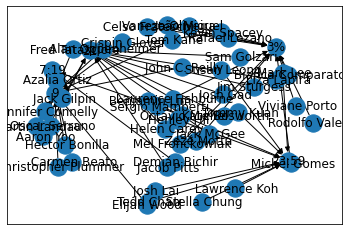

In [65]:
G = nx.DiGraph()
for ind in subdf.index[:5]:
    movie = subdf['title'][ind]
    this_cast = subdf['cast'][ind].split(',')
    for actor in this_cast:
        G.add_edge(actor, movie)
pos = nx.spring_layout(G, k=0.9, iterations=50)
nx.draw_networkx(G,pos)

In [6]:
data = []
for node in network.nodes():
    out_degree = network.out_degree(node)
    if out_degree > 0:
        row = {
            'actor': node,
            'out_degree': out_degree
        }
        data.append(row)
degree_df = pd.DataFrame(data, columns = ['actor', 'out_degree'])

In [7]:
degree_df.head()

,actor,out_degree
0,João Miguel,1
1,Bianca Comparato,2
2,Michel Gomes,1
3,Rodolfo Valente,1
4,Vaneza Oliveira,1


In [ ]:
degree_df[degree_df['out_degree']==degree_df['out_degree'].max()]